https://python-twitter.readthedocs.io/en/latest/getting_started.html

In [0]:
pip install tweepy

In [0]:
import networkx as nx
import tweepy
import json
import time

In [0]:
credenciais = open('twitter_credentials.json').read()
info = json.loads(credenciais)

consumer_key = info['CONSUMER_KEY']
consumer_secret = info['CONSUMER_SECRET']
access_key = info['ACCESS_KEY']
access_secret = info['ACCESS_SECRET']

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [0]:
amigosNeymar = []
arestas = []
nomeVizinhos = []
amigosDoAmigo = []
vertices = []

In [0]:
neymarJr = api.get_user(screen_name="NeymarJr")

try:
  for amigoNeymar in tweepy.Cursor(api.friends, screen_name="NeymarJr").items(10):
    amigosNeymar.append(amigoNeymar)
    vertices.append(amigoNeymar)
    time.sleep(1)
except tweepy.RateLimitError:
  print('sleep 1 minute')
  time.sleep(60)
except tweepy.error.TweepError:
  print("Failed to run the command on that user, Skipping...")

In [0]:
for amigoNeymar in amigosNeymar:
  arestas.append((neymarJr, amigoNeymar))
  
  try:
    for amigoDoAmigo in tweepy.Cursor(api.friends, screen_name=amigoNeymar.screen_name).items(5):
      amigosDoAmigo.append(amigoDoAmigo)
      vertices.append(amigoDoAmigo)
  except tweepy.RateLimitError:
           print('sleep 1 minute')
           time.sleep(60)
  except tweepy.error.TweepError:
      print("Failed to run the command on that user, Skipping...")
  
  for amigoDoAmigo in amigosDoAmigo:
    arestas.append((amigoNeymar, amigoDoAmigo))

In [0]:
verticesAux = [vertice.name.split(" ")[0] if vertice.name.split(" ")[0] != 'DAZN' else vertice.name for vertice in vertices]
arestasAux = [
    (aresta[0].name.split(" ")[0] if aresta[0].name.split(" ")[0] != 'DAZN' else aresta[0].name,
    aresta[1].name.split(" ")[0] if aresta[1].name.split(" ")[0] != 'DAZN' else aresta[1].name) 
    for aresta in arestas]

In [0]:
G = nx.Graph()
G.add_node(neymarJr.name.split(" ")[0])

In [0]:
for vertice in verticesAux: 
  if vertice not in G:
    G.add_node(vertice)

In [0]:
G.add_edges_from(arestasAux)

In [0]:
colors = ["blue" for n in G.nodes(data=True)]

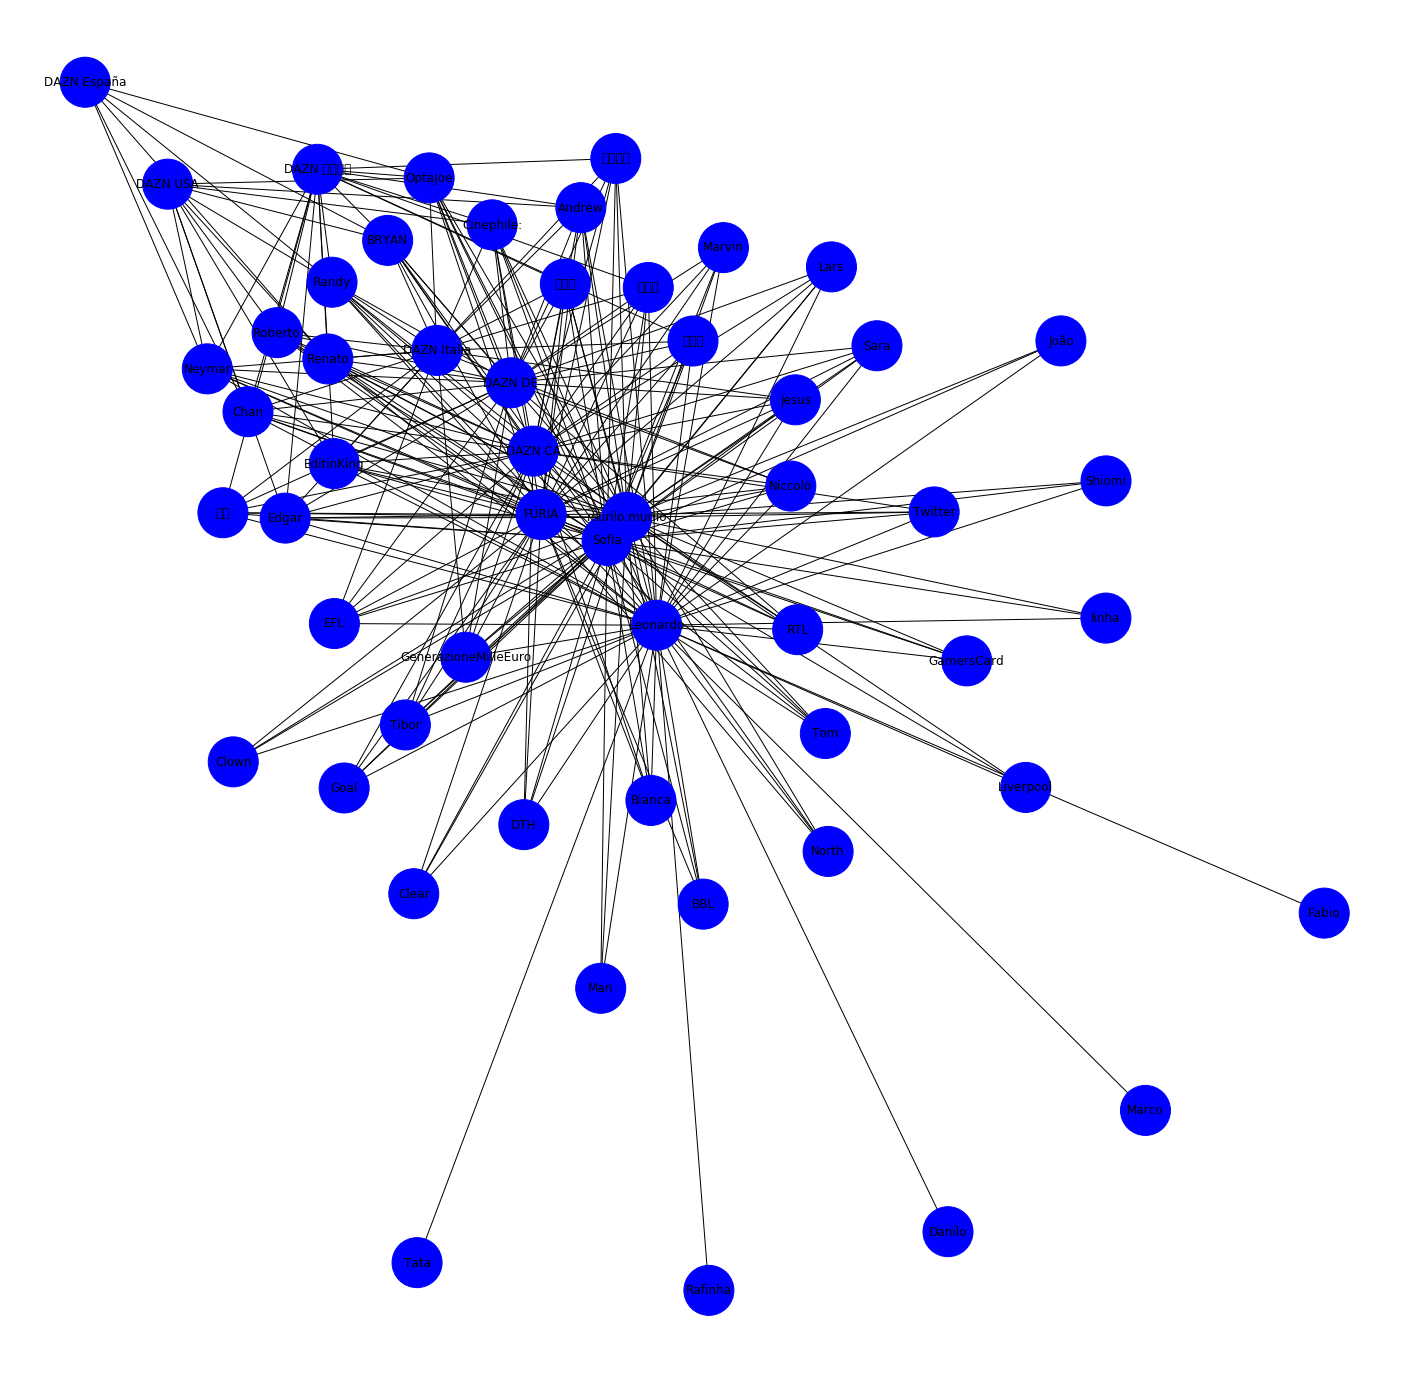

In [400]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,25))
node_size = [2500 for node in G.nodes]
nx.draw_networkx(G, node_size=node_size, node_color=colors)
plt.axis("off")
plt.show()

In [0]:
!pip install git+https://github.com/ericmjl/nxviz

In [0]:
import nxviz

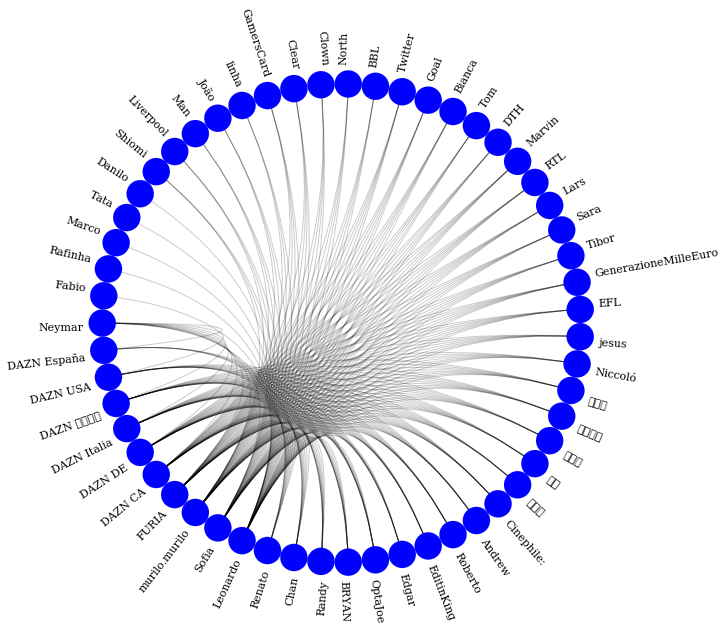

In [402]:
import matplotlib.py--plot as plt
from nxviz import CircosPlot

c = CircosPlot(G, node_labels=True,
               figsize = (10,10),
               nodeprops={"radius": 0.5},
               group_order="default",
               node_label_layout="rotation",
               fontsize=11)

c.draw()
c.figure.tight_layout()
plt.show()